In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../datasets/groovy-1_6_BETA_1.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,experimental/groovy/lang/MOP.java,0,1,165,1,15,1,3,15,1,...,0.987879,0.5,0,1,2,1,False,0,False,0
1,experimental/groovy/lang/NewMetaClass.java,0,2,341,1,0,1,3,59,1,...,1.000000,0.0,0,1,0,0,False,0,False,0
2,experimental/org/codehaus/groovy/runtime/MetaC...,0,2,32,1,0,1,0,2,1,...,1.000000,0.0,0,1,0,0,False,0,False,0
3,experimental/org/codehaus/groovy/runtime/MetaC...,7,18,382,13,0,1,3,42,4,...,1.000000,0.0,0,1,0,0,False,0,False,0
4,experimental/org/codehaus/groovy/runtimemetacl...,0,5,70,2,0,1,0,6,1,...,1.000000,0.0,0,1,0,0,False,0,False,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       821 non-null    object 
 1   CountDeclMethodPrivate     821 non-null    int64  
 2   AvgLineCode                821 non-null    int64  
 3   CountLine                  821 non-null    int64  
 4   MaxCyclomatic              821 non-null    int64  
 5   CountDeclMethodDefault     821 non-null    int64  
 6   AvgEssential               821 non-null    int64  
 7   CountDeclClassVariable     821 non-null    int64  
 8   SumCyclomaticStrict        821 non-null    int64  
 9   AvgCyclomatic              821 non-null    int64  
 10  AvgLine                    821 non-null    int64  
 11  CountDeclClassMethod       821 non-null    int64  
 12  AvgLineComment             821 non-null    int64  
 13  AvgCyclomaticModified      821 non-null    int64  

In [7]:
df.shape

(821, 70)

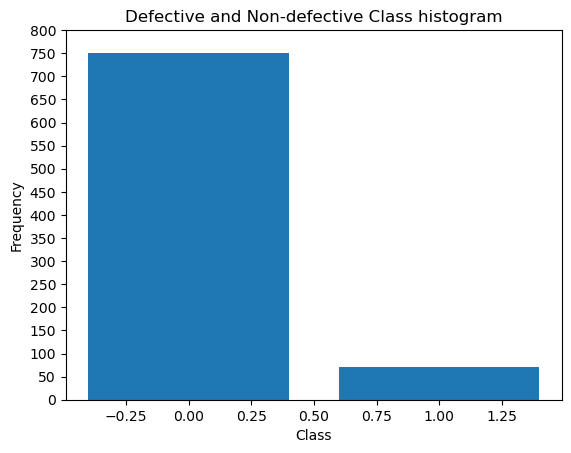

In [8]:
#Defective and Non-defective Class histogram
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Defective and Non-defective Class histogram')
plt.xticks(rotation=0)
# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 50))
# show the grid
# plt.grid(axis='y')
plt.show()


In [9]:
class_counts

RealBug
False    751
True      70
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

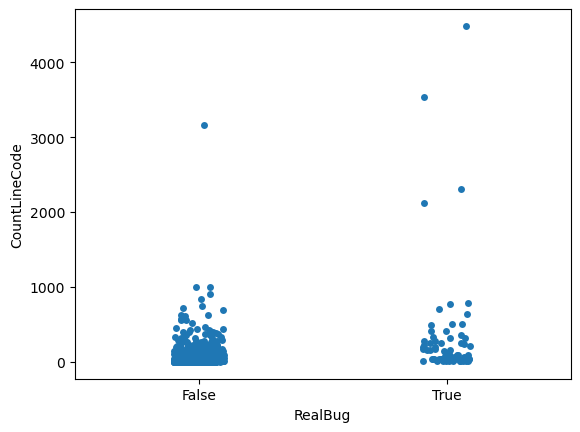

In [10]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

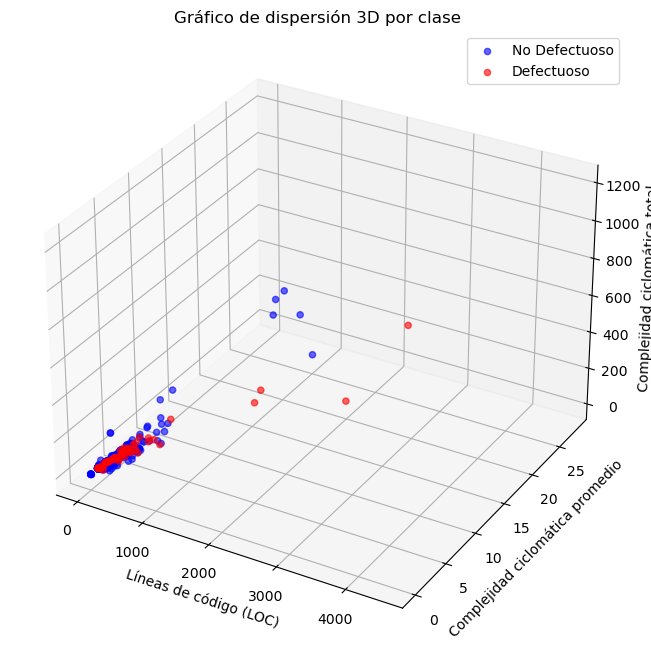

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar por clase
defective = df[df['RealBug'] == 1]
non_defective = df[df['RealBug'] == 0]

# Graficar cada clase con diferente color
ax.scatter(non_defective['CountLineCode'], 
           non_defective['AvgCyclomatic'], 
           non_defective['SumCyclomatic'],
           c='blue', label='No Defectuoso', alpha=0.6)

ax.scatter(defective['CountLineCode'], 
           defective['AvgCyclomatic'], 
           defective['SumCyclomatic'],
           c='red', label='Defectuoso', alpha=0.6)

ax.set_xlabel('Líneas de código (LOC)')
ax.set_ylabel('Complejidad ciclomática promedio')
ax.set_zlabel('Complejidad ciclomática total')
ax.set_title('Gráfico de dispersión 3D por clase')
ax.legend()

plt.show()

## Preprocesamiento

- isNull / Missing values
- Duplicados
- Outlaiers ( no porque el metodo HCBOU de balanceo no lo recomienda)
- Particion Train/Test
- Transformación de los datos - Normalización/Estandarización (StandarScaler)
- Balanceo de clases - HCBOU
- Seleccion de caracteristicas (arbol de decision - CABOOST) 
- Reduccion de Dimensionalidad (PCA)

### Missing Values

In [12]:
df.isnull().sum()

File                      0
CountDeclMethodPrivate    0
AvgLineCode               0
CountLine                 0
MaxCyclomatic             0
                         ..
MAJOR_LINE                0
HeuBug                    0
HeuBugCount               0
RealBug                   0
RealBugCount              0
Length: 70, dtype: int64

### Duplicated

In [13]:
df.duplicated().sum()

0

### Split Train/Test 80/20

In [14]:
# split train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RealBug'])
y = df['RealBug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print(X_train.shape)
print(X_test.shape)

(656, 69)
(165, 69)


### Normalización

In [16]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)

In [17]:
X_train_numeric.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBugCount,RealBugCount
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.00000,...,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,1.434451,6.583841,185.103659,5.339939,0.873476,1.132622,1.335366,29.664634,1.722561,8.20122,...,70.274390,29.028963,0.786484,0.355303,0.012195,2.086890,0.679878,0.939024,0.388720,0.216463
std,11.450870,7.056737,518.957118,17.990039,9.025705,0.549062,9.424851,87.563493,2.190021,8.74066,...,326.317273,142.732668,0.204121,0.434954,0.182863,1.089889,0.954519,1.629668,1.761278,1.042064
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.262651,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,47.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.00000,...,0.000000,0.000000,0.622619,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,77.000000,2.000000,0.000000,1.000000,0.000000,8.000000,1.000000,6.00000,...,0.000000,0.000000,0.849307,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,8.000000,161.750000,4.250000,0.000000,1.000000,0.000000,22.000000,2.000000,10.00000,...,29.000000,4.000000,0.989773,0.881250,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,274.000000,81.000000,10322.000000,217.000000,220.000000,8.000000,216.000000,1248.000000,28.000000,91.00000,...,5972.000000,2225.000000,1.000000,1.000000,4.000000,6.000000,5.000000,21.000000,25.000000,13.000000


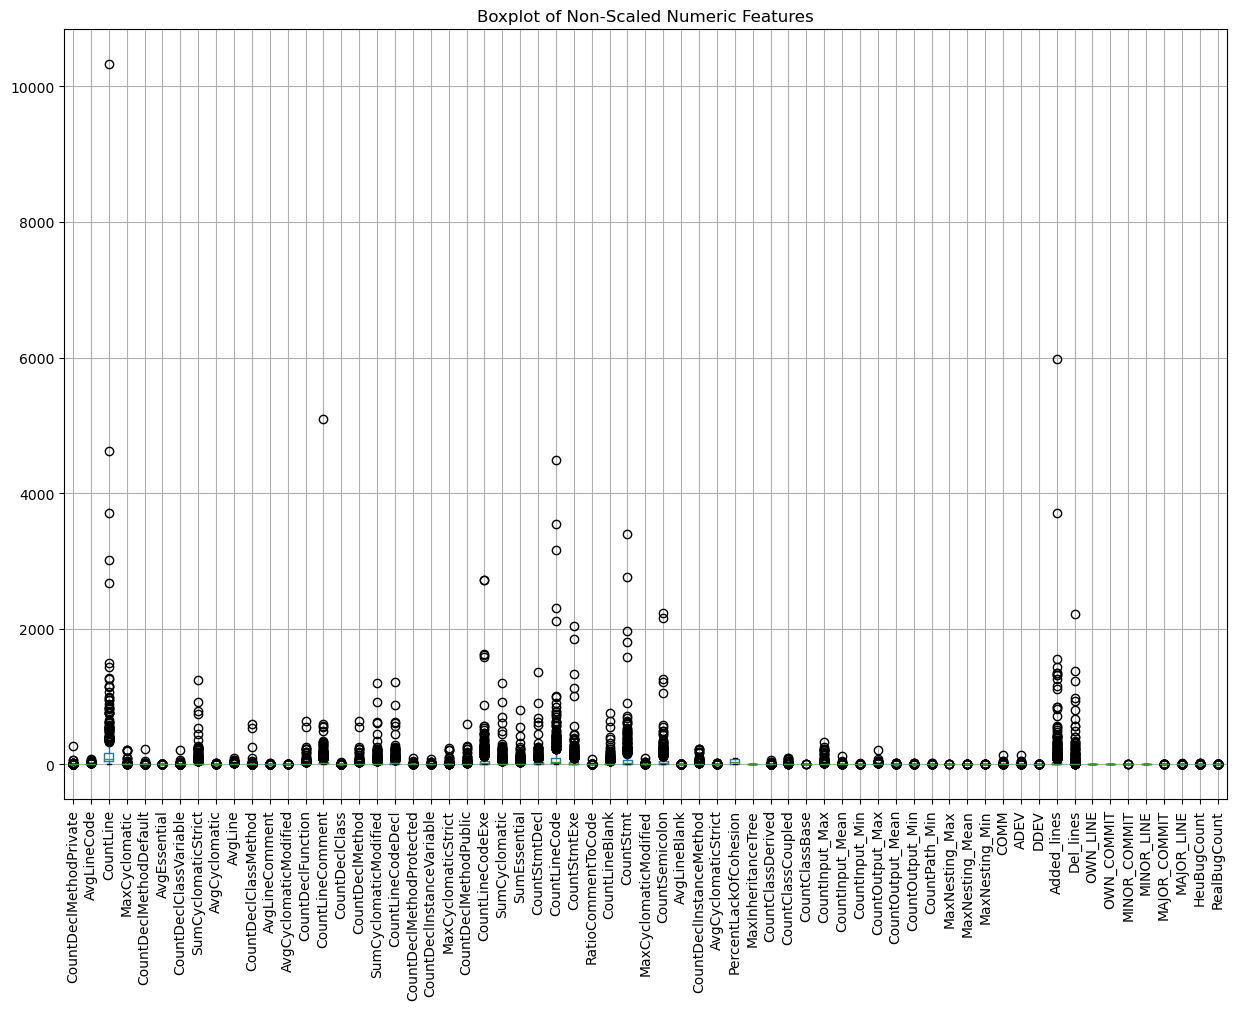

In [18]:
plt.figure(figsize=(15, 10))
X_train_numeric.drop(columns=['CountPath_Max', 'CountPath_Mean']).boxplot()
plt.title('Boxplot of Non-Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [19]:
X_train_numeric_scaled.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBugCount,RealBugCount
count,656.000000,6.560000e+02,6.560000e+02,6.560000e+02,656.000000,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,...,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,6.560000e+02,656.000000,6.560000e+02
mean,0.000000,-2.166289e-17,1.353931e-17,-1.083144e-17,0.000000,8.935941e-17,-5.415722e-18,-3.384826e-19,-5.280329e-17,-4.061792e-18,...,-2.166289e-17,2.166289e-17,5.889598e-16,5.144936e-17,5.415722e-18,-9.477514e-18,-2.978647e-17,1.624717e-17,0.000000,1.489324e-17
std,1.000763,1.000763e+00,1.000763e+00,1.000763e+00,1.000763,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,...,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,1.000763e+00,1.000763,1.000763e+00
min,-0.125366,-9.336986e-01,-3.434572e-01,-2.970540e-01,-0.096850,-2.064407e+00,-1.417937e-01,-3.390371e-01,-7.871501e-01,-9.389997e-01,...,-2.155204e-01,-2.035351e-01,-2.568242e+00,-8.174983e-01,-6.674086e-02,-9.980094e-01,-7.128167e-01,-5.766456e-01,-0.220871,-2.078842e-01
25%,-0.125366,-5.082485e-01,-2.663207e-01,-2.414253e-01,-0.096850,-2.417273e-01,-1.417937e-01,-3.047501e-01,-3.301851e-01,-5.955143e-01,...,-2.155204e-01,-2.035351e-01,-8.033960e-01,-8.174983e-01,-6.674086e-02,-9.980094e-01,-7.128167e-01,-5.766456e-01,-0.220871,-2.078842e-01
50%,-0.125366,-2.246151e-01,-2.084684e-01,-1.857966e-01,-0.096850,-2.417273e-01,-1.417937e-01,-2.476051e-01,-3.301851e-01,-2.520289e-01,...,-2.155204e-01,-2.035351e-01,3.080093e-01,-8.174983e-01,-6.674086e-02,-7.978476e-02,-7.128167e-01,-5.766456e-01,-0.220871,-2.078842e-01
75%,-0.125366,2.008349e-01,-4.503547e-02,-6.063193e-02,-0.096850,-2.417273e-01,-1.417937e-01,-8.759910e-02,1.267799e-01,2.059516e-01,...,-1.265820e-01,-1.754893e-01,9.966827e-01,1.210126e+00,-6.674086e-02,8.384399e-01,3.356312e-01,3.744452e-02,-0.220871,-2.078842e-01
max,23.821207,1.055345e+01,1.954811e+01,1.177438e+01,24.296576,1.251703e+01,2.279383e+01,1.392435e+01,1.200787e+01,9.480057e+00,...,1.809965e+01,1.539694e+01,1.046824e+00,1.483352e+00,2.182426e+01,3.593114e+00,4.529423e+00,1.231925e+01,13.984195,1.227688e+01


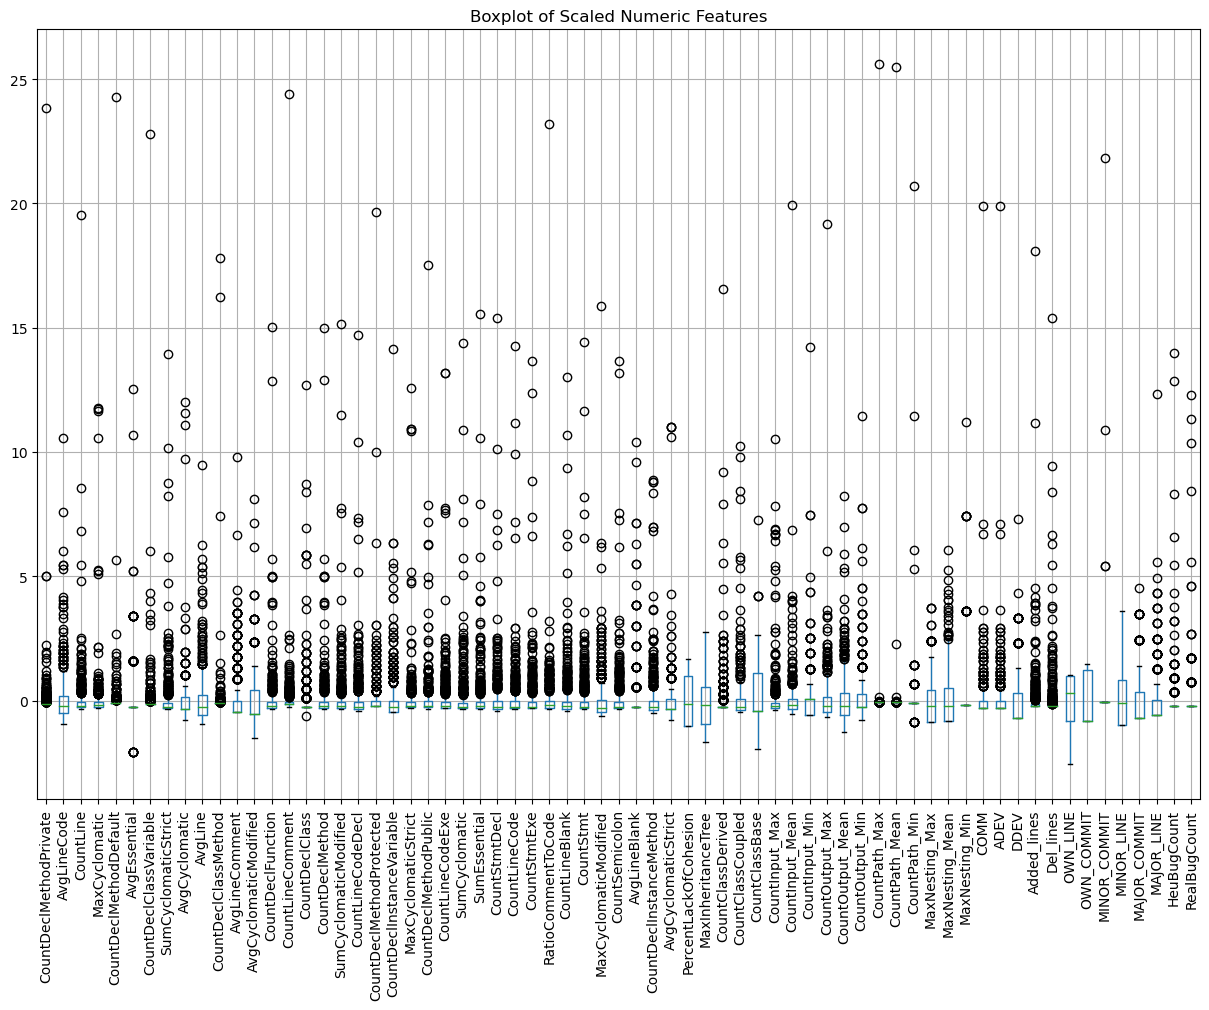

In [20]:
plt.figure(figsize=(15, 10))
X_train_numeric_scaled.boxplot()
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()